# **Introduction**

There are many travel sites on the Internet, including FourSquare, that will tell you all about places to go, adventurous landscapes, restaurants to eat at, bars, nightclubs etc. The problems with these sites is that they do not tell you all the details. If you want to find out all the necessary information about a place you plan to visit in the future, you have to do the a lot of research. Also, just because a venue is the hottest place to go for a night out does not always mean that the unwitting tourist should just ramble in unprepared. The areas surrounding this new venue might be riddled with crime including car highjacking and assault etc.This is where the idea comes in.

# **The big Idea**

My idea for the Capstone Project is to show that when driven by venue and location data from FourSquare, backed up with open source crime data, that it is possible to present the cautious and nervous traveller with a list of attractions to visit supplementd with a graphics showing the occurance of crime in the region of the venue.
The main idea is t present the traveller with all the necessary information about that particular place so they can make a better choice for the place they want to visit, For example:
-A map is presented to the to the traveller showing the selected venues and crime statistics of the area.

# **Data**

The following will be addressed in this project:
-Query the FourSqaure website for the top sites in Chicago
-Use the FourSquare API to get supplemental geographical data about the top sites
-Use the FourSquare API to get top restaurent recommendations closest to each of the top site
-Use open source Chicago Crime data to provide the user with additional crime data

# **Using Foursquare website the following place was retrieved:**

This is the HTML Format of the place retrieved:

<div class="venueDetails">
    <div class="venueName">
        <h2>
    <a href="/v/millennium-park/42b75880f964a52090251fe3" target="_blank">Millennium Park
    </a>
</h2>
    </div>
    <div class="venueMeta">
        <div class="venueScore positive" style="background-color: #00B551;" title="9.7/10 - People like this place">9.7</div>
        <div class="venueAddressData">
            <div class="venueAddress">201 E Randolph St (btwn Columbus Dr &amp; Michigan Ave), Chicago</div>
            <div class="venueData"><span class="venueDataItem"><span class="categoryName">Park</span><span class="delim"> • </span></span>
            </div>
        </div>
    </div>
</div>

<div class="venueDetails">
    <div class="venueName">
        <h2>
    <a href="/v/millennium-park/42b75880f964a52090251fe3" target="_blank">Millennium Park
    </a>
</h2>
    </div>
    <div class="venueMeta">
        <div class="venueScore positive" style="background-color: #00B551;" title="9.7/10 - People like this place">9.7</div>
        <div class="venueAddressData">
            <div class="venueAddress">201 E Randolph St (btwn Columbus Dr &amp; Michigan Ave), Chicago</div>
            <div class="venueData"><span class="venueDataItem"><span class="categoryName">Park</span><span class="delim"> • </span></span>
            </div>
        </div>
    </div>
</div>

**From this HTML the following data can be extracted:**

-Venue Name

-Venue Score

-Venue Category

-Venue HREF 

-Venue ID [Extracted from the HREF]

In [5]:
import numpy as np 

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

!conda install -c conda-forge folium=0.5.0 --yes 
import folium

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [13]:
CLIENT_ID = '1Q4G4F25KPMGQXWXACAU3D5VFZS54OU2JVPVMFCDIVNZCAKQ' 
CLIENT_SECRET = 'TMS0PO1DZV35Z4K4JUNHNKQKL2YWBQK0DAI2YLBZTKBNCBHK'
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1Q4G4F25KPMGQXWXACAU3D5VFZS54OU2JVPVMFCDIVNZCAKQ
CLIENT_SECRET:TMS0PO1DZV35Z4K4JUNHNKQKL2YWBQK0DAI2YLBZTKBNCBHK


# **Geographical Data**

In [ ]:
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
    venue_id, 
    cfg['CLIENT_ID'],
    cfg['CLIENT_SECRET'],
    cfg['version'])
    
result = requests.get(url).json()
result['response']['venue']['location']

**From this the following attributes are extracted:**

-Venue Address

-Venue Postalcode

-Venue City

-Venue Latitude

-Venue Longitude

{  
   "city":"Chicago",
   "lng":-87.62323915831546,
   "crossStreet":"btwn Columbus Dr & Michigan Ave",
   "neighborhood":"The Loop",
   "postalCode":"60601",
   "cc":"US",
   "formattedAddress":[  
      "201 E Randolph St (btwn Columbus Dr & Michigan Ave)",
      "Chicago, IL 60601",
      "United States"
   ],
   "state":"IL",
   "address":"201 E Randolph St",
   "lat":41.8826616030636,
   "country":"United States"
}

# Methodology
Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, and what machine learnings were used and why.

**Exploratory Data Analysis**
The first round of eploratory analysis was to examine the Top Venues and Restaurants Dataframes to determine if there was any correlation between variables.

Unforfunately the only data attributes that could be analysed were the Latitude and Longitude attributes and their relationship to the venuse score. Top Venues was examined First.

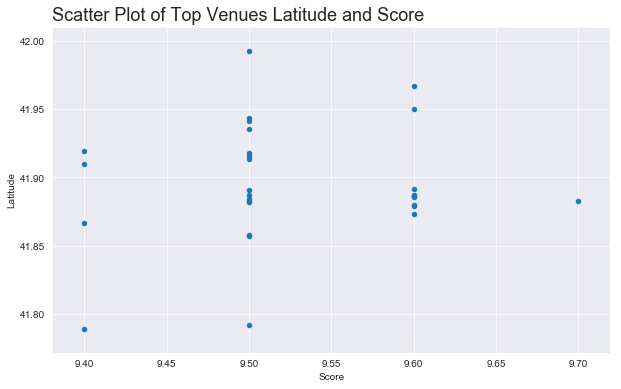

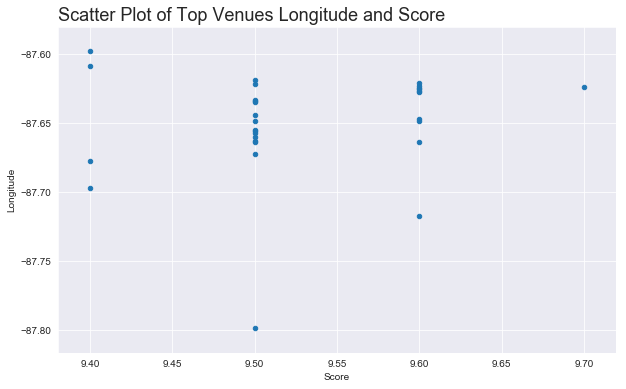

Although nothing obvious to would appear that the top venues are centered arounf the -87.65 Longitude.

the Restaurant data was examined next.

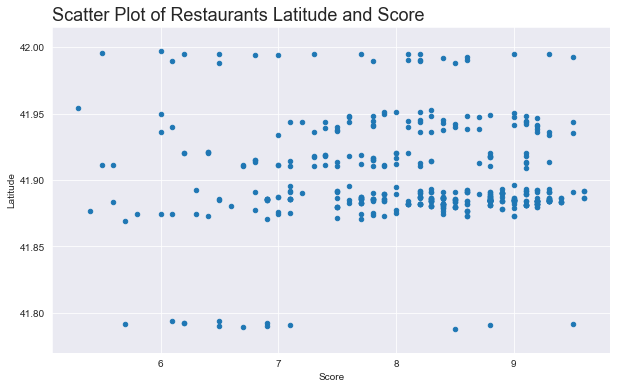

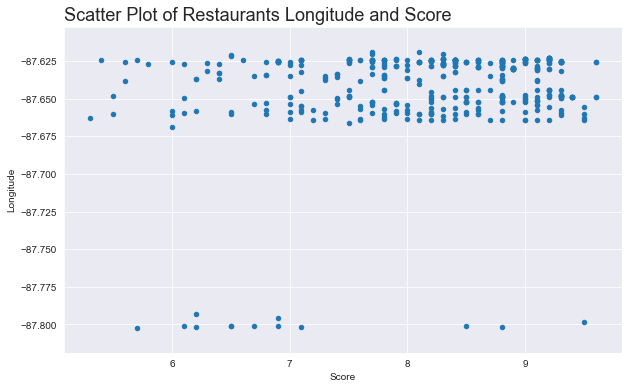

# Data Visualisation

The first map below is the top rated venue Millennium Park. The location of the attraction and the 10 top rated venues are clearly shown. The Top Venue is shown using a blue marker, the restaurants are shown using a red marker. Also shown is the heatmap of cimes within 750 meters over the course of the entire previous year. The hotter, redder, the heatmap the more crimes there are recorded. Some Restaurants, for example the two located at the top left of the map, appear to be in areas where crime is quite frequent. On the other hand others are in areas which are obviously not as crime ridden.

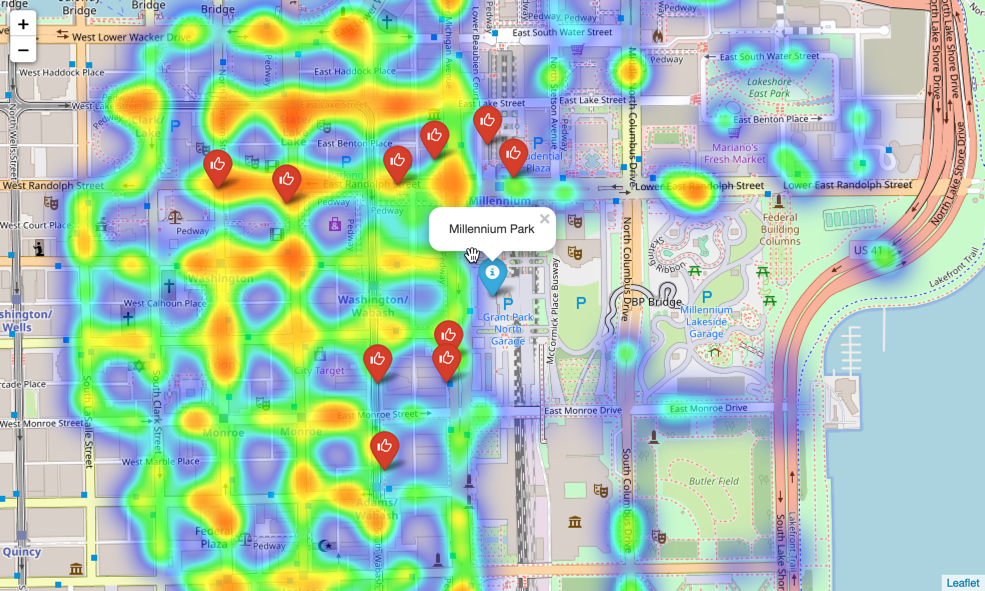

The second map is for The Music Box Theatre. It is immediately apparent that the crime rate in this area of the city is much lower:
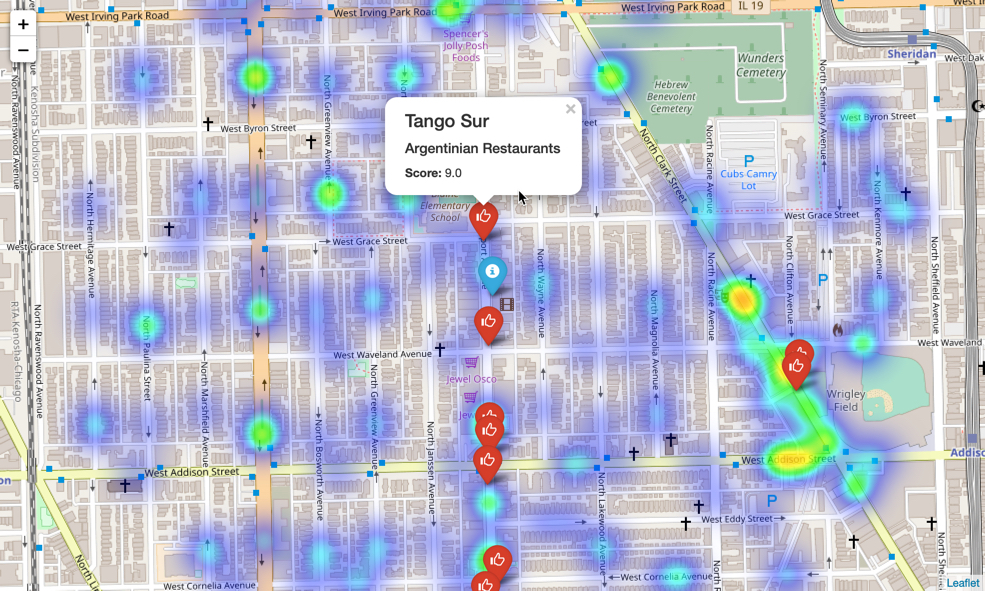


# Modelling

Rather than removing colums from df_crimes a new df_features DataFrame was created with just the required columns. This df_features DataFrame was then processed to remove Categorical Data Types and replace them with One Hot encoding. Finally the Dependant Variables were Normalised.

The Features DataFrame looked like this: